# Setup

In [1]:
#Set dependencies and set-up
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#Import datetime
import datetime as dt

#Import Pandas
import pandas as pd

#Import dependencies - Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Explore Database

In [2]:
#Create engine
engine = create_engine(f'sqlite:///../sql-alchemy-challenge/Resources/hawaii.sqlite')

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()


['measurement', 'station']

In [3]:
# Save References to Each Table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create/Start a session to query the database
session = Session(engine)

# Display the row's columns and data in dictionary format
# first_row = session.query(Station).first()
# first_row.__dict__

# Display the row's columns and data in dictionary format
# first_row = session.query(Measurement).first()
# first_row.__dict__


# Precipitation Analysis

In [4]:
#Design a query to retrieve the last 12 months of precipitation data

#Query for last date in measurement table
#last day: 2017-08-23 
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#Query for the last date and the last 12 months for precipitation
#year ago date: 2016-08-23
year_ago = dt.date(2017,8, 23) - dt.timedelta(days=365)

#Query for 2016-2017 dates in measurement table
#Date range: 08/23/2016 to 08/23/2017 
measurement_1617 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()


In [5]:
#Save the Query Results as a Pandas DataFrame and 
#Set the Index to the Date Column & Sort the Dataframe Values by date
measurement_1617_df = pd.DataFrame(measurement_1617)
measurement_1617_df = measurement_1617_df.set_index('date')
measurement_1617_df = measurement_1617_df.rename(columns ={'prcp': 'Precipitation'})
measurement_1617_df 


,Precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


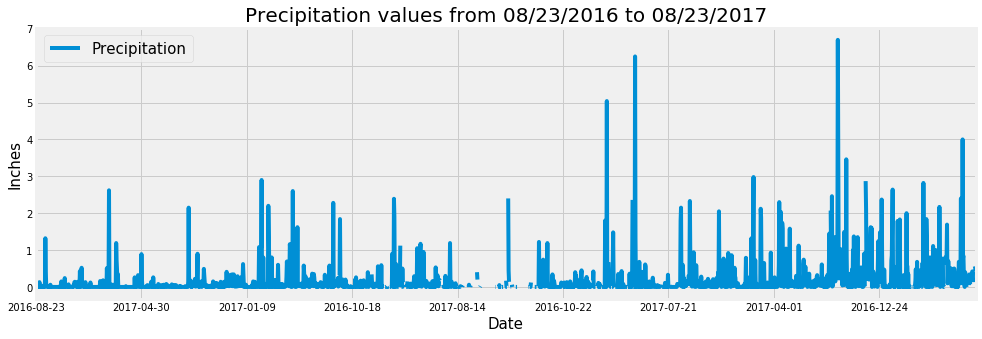

In [6]:
#Use Pandas Plotting with Matplotlib to plot the Data
#Creating line plot with pandas
measurement_lineplot = measurement_1617_df.plot(kind='line', figsize=(15,5))

#Creating chart title and labels
plt.title("Precipitation values from 08/23/2016 to 08/23/2017", fontsize='20')
plt.xlabel("Date", fontsize='15')
plt.ylabel("Inches", fontsize='15')


#setting legend
plt.legend(loc="upper left", fontsize='15')

#saving and showing figure
plt.savefig(f'../sql-alchemy-challenge/Output_data/Precipitation_Analysis.png')

plt.show()


In [7]:
#Use Pandas to Calculate the Summary Statistics for the Precipitation Data

measurement_1617_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [8]:
#Design a query to calculate the total number of stations.
session.query(func.count(Station.name)).all()

[(9)]

In [9]:
# Design a query to find the most active stations
station_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [10]:
#Find the stations and group their occurences and count those occurences
station_observe = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

#Query this into a DataFrame 
station_observe_df = pd.DataFrame(station_observe, columns =['Station', 'Observation counts'])
station_observe_df


,Station,Observation counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


Which station has the highest number of observations?
The USC00519281 station

In [11]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).

#Query from 08/23/2016 to 08/23/2017 dates in measurement table for observations
# Filter by the station with the highest number of observations
observations_1617 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == 'USC00519281').all()

observations_1617_df = pd.DataFrame(observations_1617)
observations_1617_df = observations_1617_df.set_index('date')
observations_1617_df = observations_1617_df.rename(columns ={'tobs': 'Temperature Observations'})
observations_1617_df.head()



,Temperature Observations
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


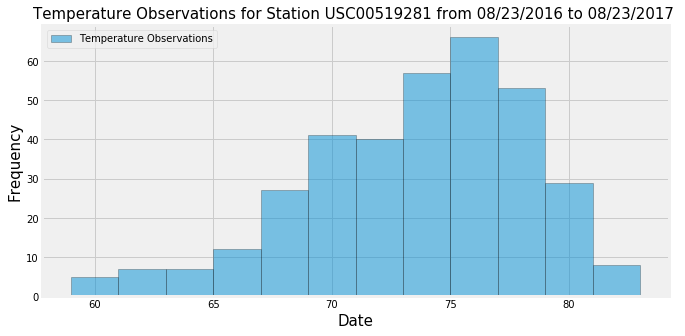

In [12]:
# Plot the results as a histogram with bins=12.

#figure size
plt.figure(figsize=(10,5))

#creating histogram
plot = plt.hist(observations_1617_df['Temperature Observations'], label ='Temperature Observations', bins=12, alpha=0.5, edgecolor='black')

#formating x and y axis and title
plt.xlabel('Date',fontsize='15')
plt.ylabel('Frequency',fontsize='15')

plt.title('Temperature Observations for Station USC00519281 from 08/23/2016 to 08/23/2017 ', fontsize='15')

plt.grid(True)

plt.legend(loc='upper left')

#saving and showing figure
plt.savefig(f'../sql-alchemy-challenge/Output_data/Station_Analysis_USC00519281.png')

plt.show()